# Analyse exploratoire des données Breast Cancer Wisconsin

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from perceptron_2 import PerceptronModel


## Introduction

Ce projet vise à appliquer un modèle de Perceptron, développé et implémenté sous forme de classe Python, sur le jeu de données Breast Cancer Wisconsin. L'objectif est de prédire si une tumeur est bénigne ou maligne.

Les étapes clés incluent :

- Analyse exploratoire et nettoyage des données
- Réduction de la dimensionnalité
- Implémentation, entraînement et évaluation du Perceptron
  
Enfin, nous évaluons l'efficacité de ce modèle pour cette problématique et explorons des pistes d'amélioration.

## Analyse exploratoire et nettoyage des données

Chargement du data set :

In [72]:
file_path = './data/bcw_data.csv'
data = pd.read_csv(file_path)

In [73]:
data.shape

(569, 33)

Nous avons 569 observations et 33 caractéristiques dans le dataset.

In [74]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [75]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Toutes les colonnes sont des valeurs numériques continues, à l'exception de la colonne cible 'diagnosis'.

### Suppression des colonnes inutiles 

Nous supprimons la colonne 'Unnamed: 32' qui comporte que des valeurs null.

In [76]:
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)

Nous remplaçons les valeurs de la colonne cible 'diagnosis' par des valeurs numériques 0 et 1.

In [77]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

Bénin --> 0

Malin --> 1

### Gestion des doublons

In [78]:
duplicates = data.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")


Nombre de doublons : 0


### Gestion des valeurs manquantes

In [79]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
Series([], dtype: int64)


Nous n'avons ni doublons ni valeurs manquantes dans le dataset.

### Statistiques descriptives

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


La moyenne est légèrement supérieure à la médiane pour la plupart des caractéristiques. C’est donc vraiment biaisé.

In [81]:
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Nous pouvons clairement voir que pour la plupart des caractéristiques, les valeurs moyennes sont plus élevées pour les cas malins (1) et plus faibles pour les cas bénins (0). 

### Répartition de la variable cible

In [82]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Les cas bénins (0) sont plus nombreux que les cas malins (1).

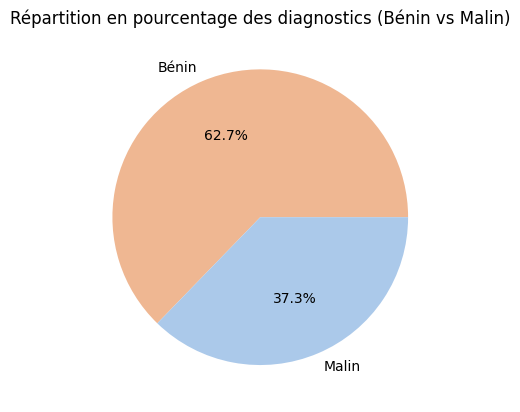

In [83]:
plt.pie(data['diagnosis'].value_counts().values, labels = ['Bénin', 'Malin'], colors = ['#EFB792', '#ABC9EA'], 
        autopct = '%1.1f%%')
plt.title('Répartition en pourcentage des diagnostics (Bénin vs Malin)')
plt.show()


### Corrélation des variables numériques avec la variable cible

In [84]:
corr = data.corr()['diagnosis'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


Dans le cadre de l'application d'un Perceptron, il est conseillé de se concentrer sur les variables les plus pertinentes, c'est-à-dire celles qui présentent une forte corrélation positive ou négative avec la cible. Les variables peu ou non corrélées (proches de 0) n'apportent généralement pas d'information utile au modèle et risquent d'ajouter du bruit.

Nous allons donc sélectionner uniquement les variables avec une corrélation absolue supérieure à 0.4, puisque les corrélations négatives sont très proche de 0.

In [85]:
datacorr= data.corr()
columns_to_keep = datacorr.index[abs(datacorr['diagnosis']) >= 0.4]
filtered_data = data[columns_to_keep]
filtered_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


### Matrice de corrélation

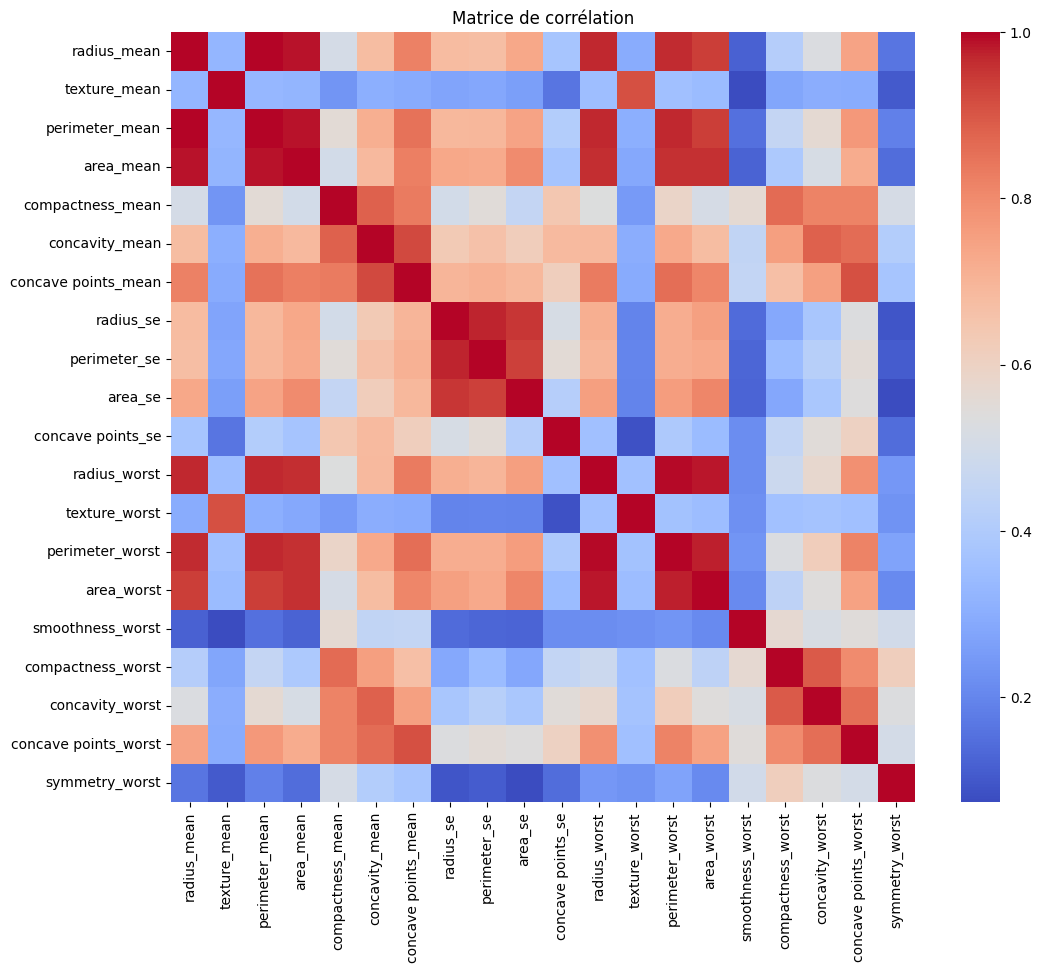

In [86]:
num_cols = filtered_data.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 10))
corr_matrix = filtered_data[num_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matrice de corrélation')
plt.show()

Dans la matrice de corrélation, nous pouvons apercevoir des caractéristiques fortement corrélées entre elles, ce qui soulève la question de la multicolinéarité. La présence de variables redondantes peut compliquer l'entraînement du modèle, entraîner une instabilité des poids et ralentir la convergence. Pour y remédier, nous allons utiliser l'Analyse en Composantes Principales (PCA) afin de conserver l'information pertinente tout en éliminant la redondance. Cela contribue à améliorer la performance et la fiabilité du modèle.



Un perceptron est un modèle relativement simple et sensible aux dimensions inutiles. Réduire le nombre de variables aide à améliorer sa capacité à converger rapidement vers une solution optimal et réduire le risque de surapprentissage.

### Densité des variables numériques

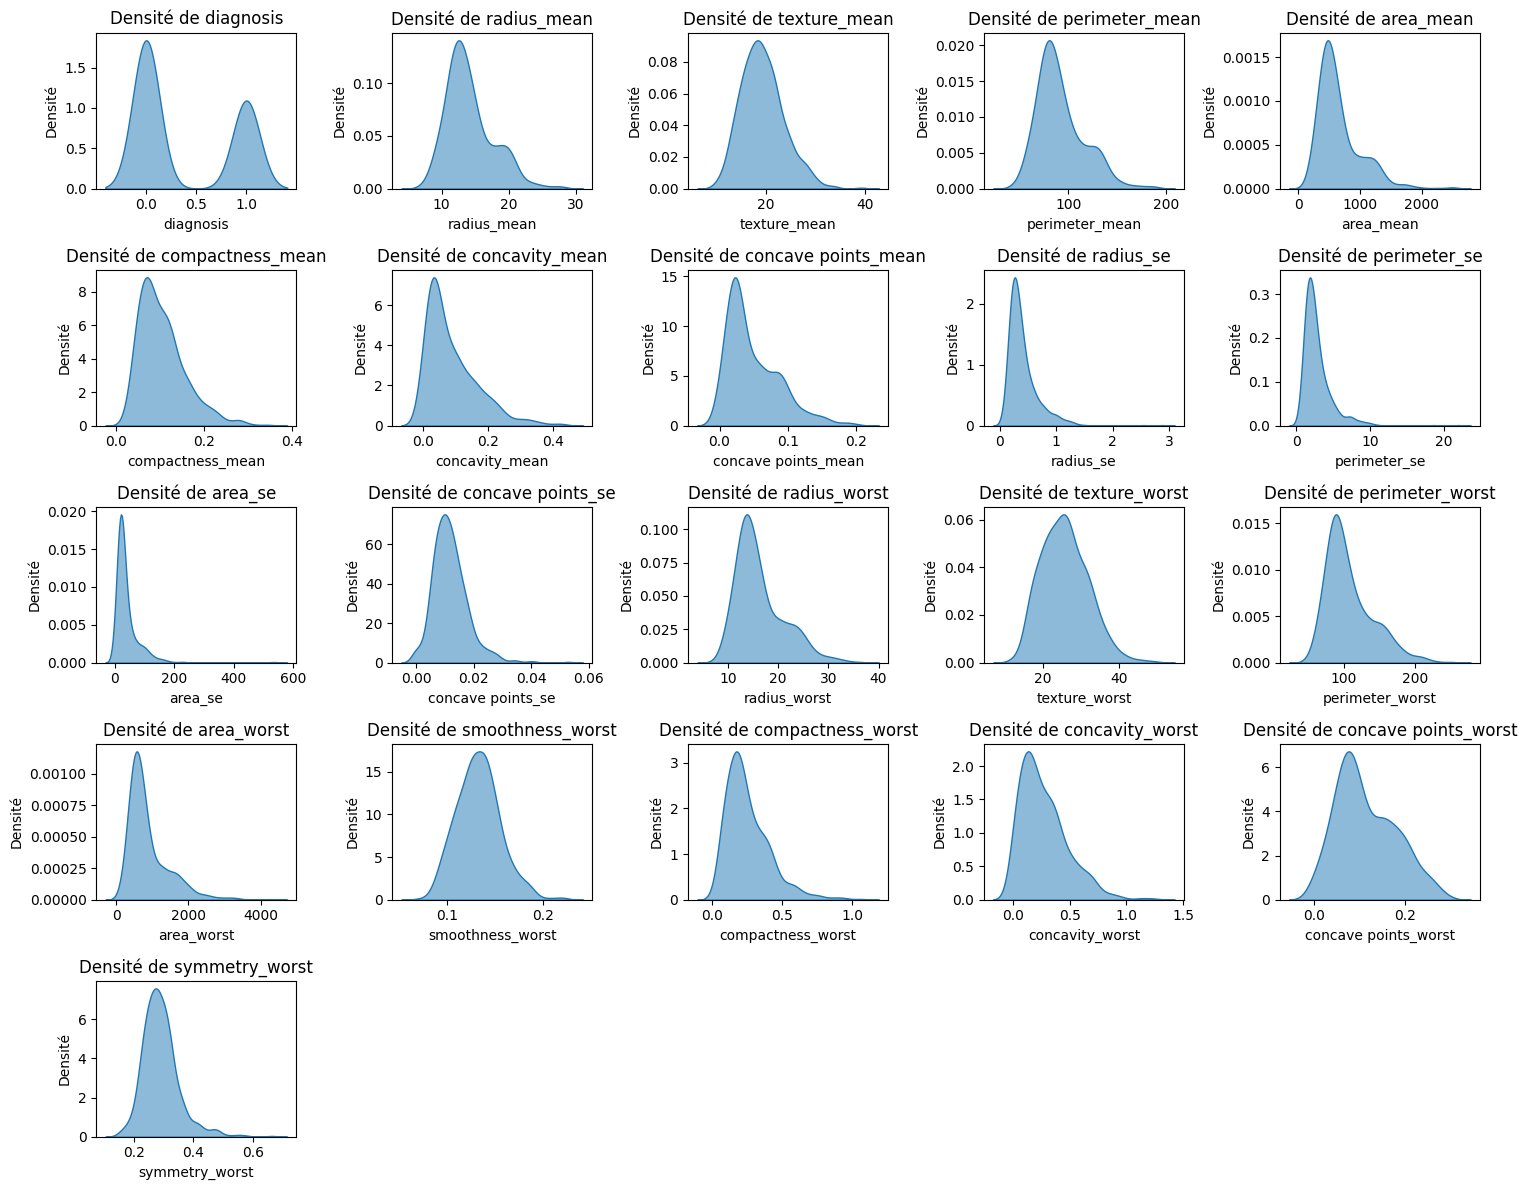

In [87]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(filtered_data.columns): 
    plt.subplot(5, 5, i + 1)  
    sns.kdeplot(data=filtered_data, x=column, fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Densité de {column}')
    plt.xlabel(column)
    plt.ylabel('Densité')

plt.tight_layout()
plt.show()

### Densité des variables numériques par diagnostic (bénin et malin)

C:\Users\anton\AppData\Local\Temp\ipykernel_3260\2005104613.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_data, x=column, hue='diagnosis', fill=True, common_norm=False, alpha=0.5)


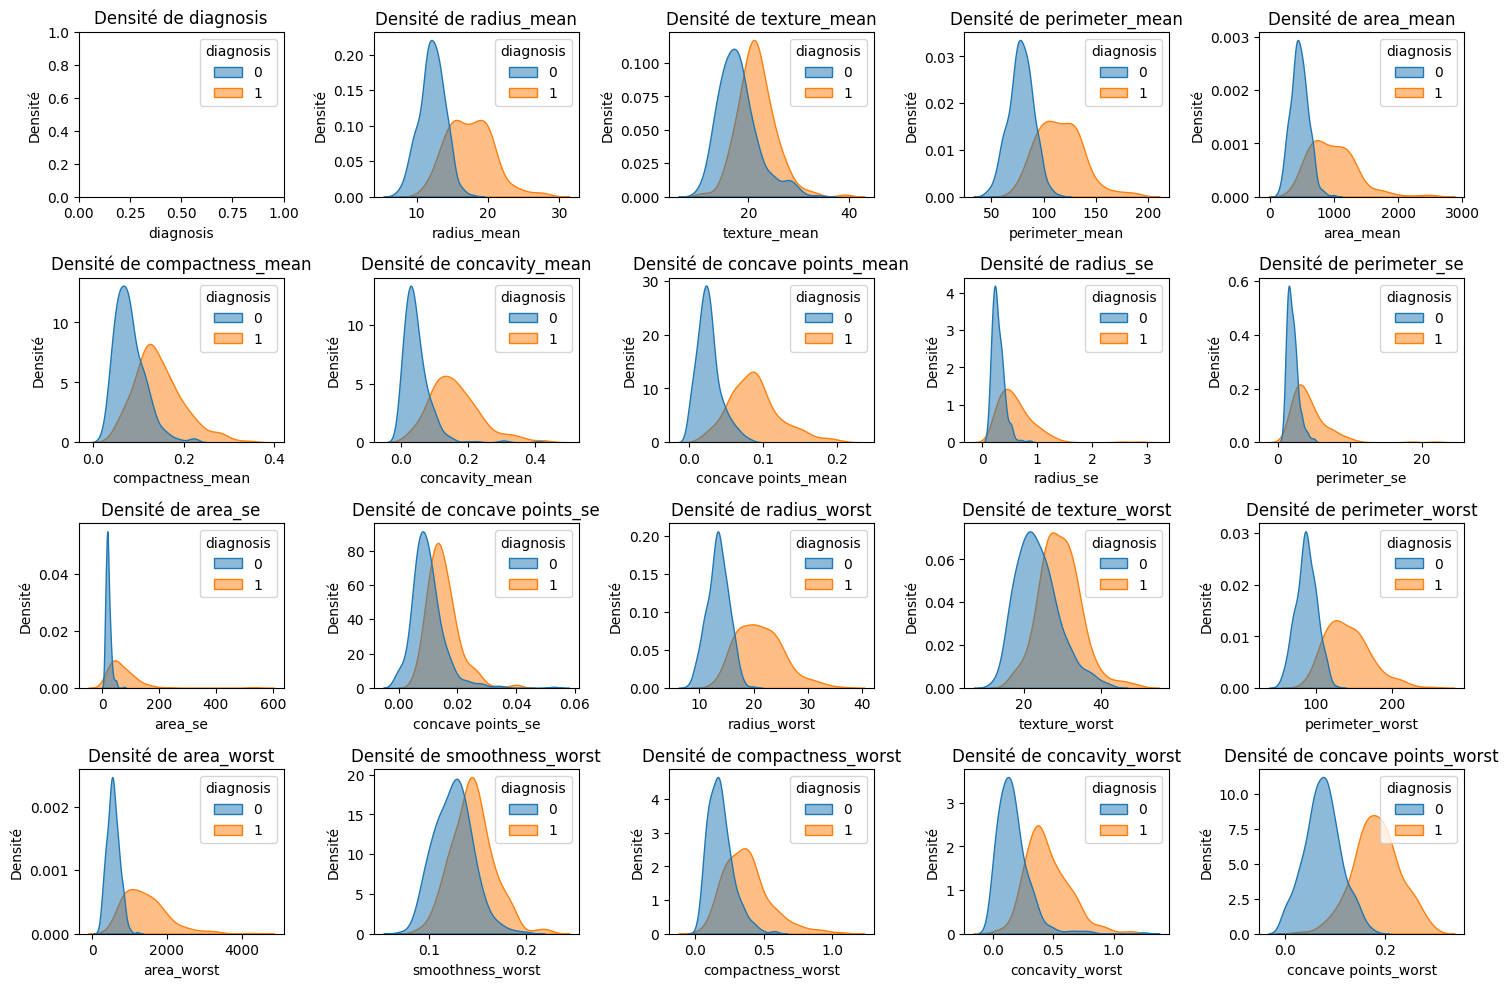

In [88]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(filtered_data.columns[:-1]):  
    plt.subplot(5, 5, i + 1) 
    sns.kdeplot(data=filtered_data, x=column, hue='diagnosis', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Densité de {column}')
    plt.xlabel(column)
    plt.ylabel('Densité')

plt.tight_layout()
plt.show()


Ici encore, nous pouvons voir que les valeurs sont plus élevées lorsque le diagnostique est Bénin(0). Cela indique une tendance claire où les caractéristiques mesurées sont plus élevées dans les cas malins que dans les cas bénins, suggérant que ces variables peuvent être liées à la gravité de la maladie. Cela pourrait offrir des pistes pour le diagnostic et le développement de traitements, tout en nécessitant une validation statistique pour confirmer la signification de ces différences.

### Gestion des valeurs aberrantes

## Réduction de la dimensionnalité

Ici, nous séparons les données en caractéristiques (X) et variable cible (y), puis on standardise les caractéristiques pour qu'elles aient une moyenne de 0 et un écart type de 1, ce qui aide à améliorer la performance et la convergence du modèle, le perceptron est un algorithme sensible à l'échelle des données. 

In [89]:
X = filtered_data.drop(columns=['diagnosis'])
y = filtered_data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Visualisation des données en 2D (ACP)

Ici, nous appliquons l'Analyse en Composantes Principales (PCA) pour réduire les dimensions de nos données à 2 composantes principales (PC1 et PC2). Cela permet de visualiser la structure des données en deux dimensions, facilitant l'analyse des relations entre les observations.

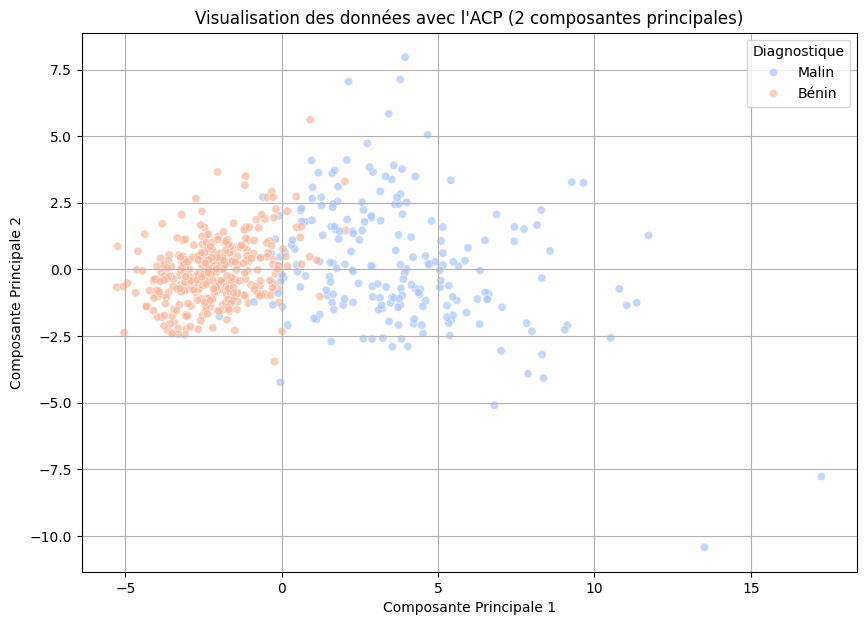

In [90]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y.map({1: 'Malignant', 0: 'Benign'})
pca_df['Diagnosis_FR'] = pca_df['Diagnosis'].replace({'Malignant': 'Malin', 'Benign': 'Bénin'})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis_FR', palette='coolwarm', alpha=0.7)
plt.title('Visualisation des données avec l\'ACP (2 composantes principales)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Diagnostique')
plt.grid(True)
plt.show()

On observe une séparation nette entre les deux classes, "Bénin" (orange) et "Malin" (bleu), ce qui indique que les deux premières composantes capturent suffisamment d'information pour différencier les groupes. Les points bénins sont concentrés dans une région définie avec peu de dispersion, tandis que les points malins présentent une plus grande variabilité. Cette séparation claire suggère que les caractéristiques initiales contiennent des informations discriminantes pertinentes, ce qui est favorable au développement d'un modèle de classification performant.

### Sélection des variables les plus pertinentes

Dans cette étape, nous appliquons l'Analyse en Composantes Principales (PCA) en spécifiant n_components=0.95, ce qui signifie que nous souhaitons conserver suffisamment de composantes principales pour expliquer au moins 95 % de la variance des données d'origine. L'utilisation de la PCA sert à réduire la dimensionnalité des données tout en préservant l'information la plus pertinente, ce qui permet d'éliminer la redondance et d'éviter les problèmes de multicolinéarité qui pourraient nuire à l'entraînement d'un modèle de classification, comme un perceptron. 

In [91]:
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

print(f'Nombre de composantes principales retenues : {pca.n_components_}')
print('Variance expliquée par chaque composante principale :', pca.explained_variance_ratio_)

Nombre de composantes principales retenues : 6
Variance expliquée par chaque composante principale : [0.60089656 0.14218475 0.08516056 0.05845971 0.03771225 0.02572928]


Les résultats montrent que six composantes principales ont été retenues lors de l'application de la PCA.

Ils suggèrent que la première composante est particulièrement importante et pourrait être utilisée pour distinguer les classes de diagnostic (bénin ou malin). En cumulant ces valeurs, on constate que les six premières composantes principales expliquent environ 87,5 % de la variance totale, ce qui montre que la majorité de l'information a été conservée malgré la réduction de dimensionnalité. Cela permet d'améliorer l'efficacité du modèle de classification que nous allons développer, tout en réduisant le risque de surajustement et en simplifiant l'apprentissage du perceptron en ne se concentrant que sur les dimensions les plus pertinentes.

## Implémentation, entraînement et évaluation du Perceptron

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
perceptron = PerceptronModel(max_iter=500, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.pred(X_test)
accuracy, report, cm = perceptron.evale(y_test, y_pred)

In [93]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[71  0]
 [ 2 41]]


## Conclusion